In [10]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy as np
# ignore warning message
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [11]:
## define arrays
N = 512
dx, dy = 0.025, 0.025

L = N*dx 
# define real space arrays 
x1 = np.linspace(-L/2, L/2, N)
y1 = np.linspace(-L/2, L/2, N)
x = reshape(x1, (N,1)) 
y = reshape(y1, (N,1)) 
X,Y = meshgrid(x1,y1)

# momentum space arrays 
kx1 = fft.fftfreq(N, dx)*2.0*pi
ky1 = fft.fftfreq(N, dy)*2.0*pi
kx = reshape(kx1, (N,1)) 
ky = reshape(ky1, (N,1))


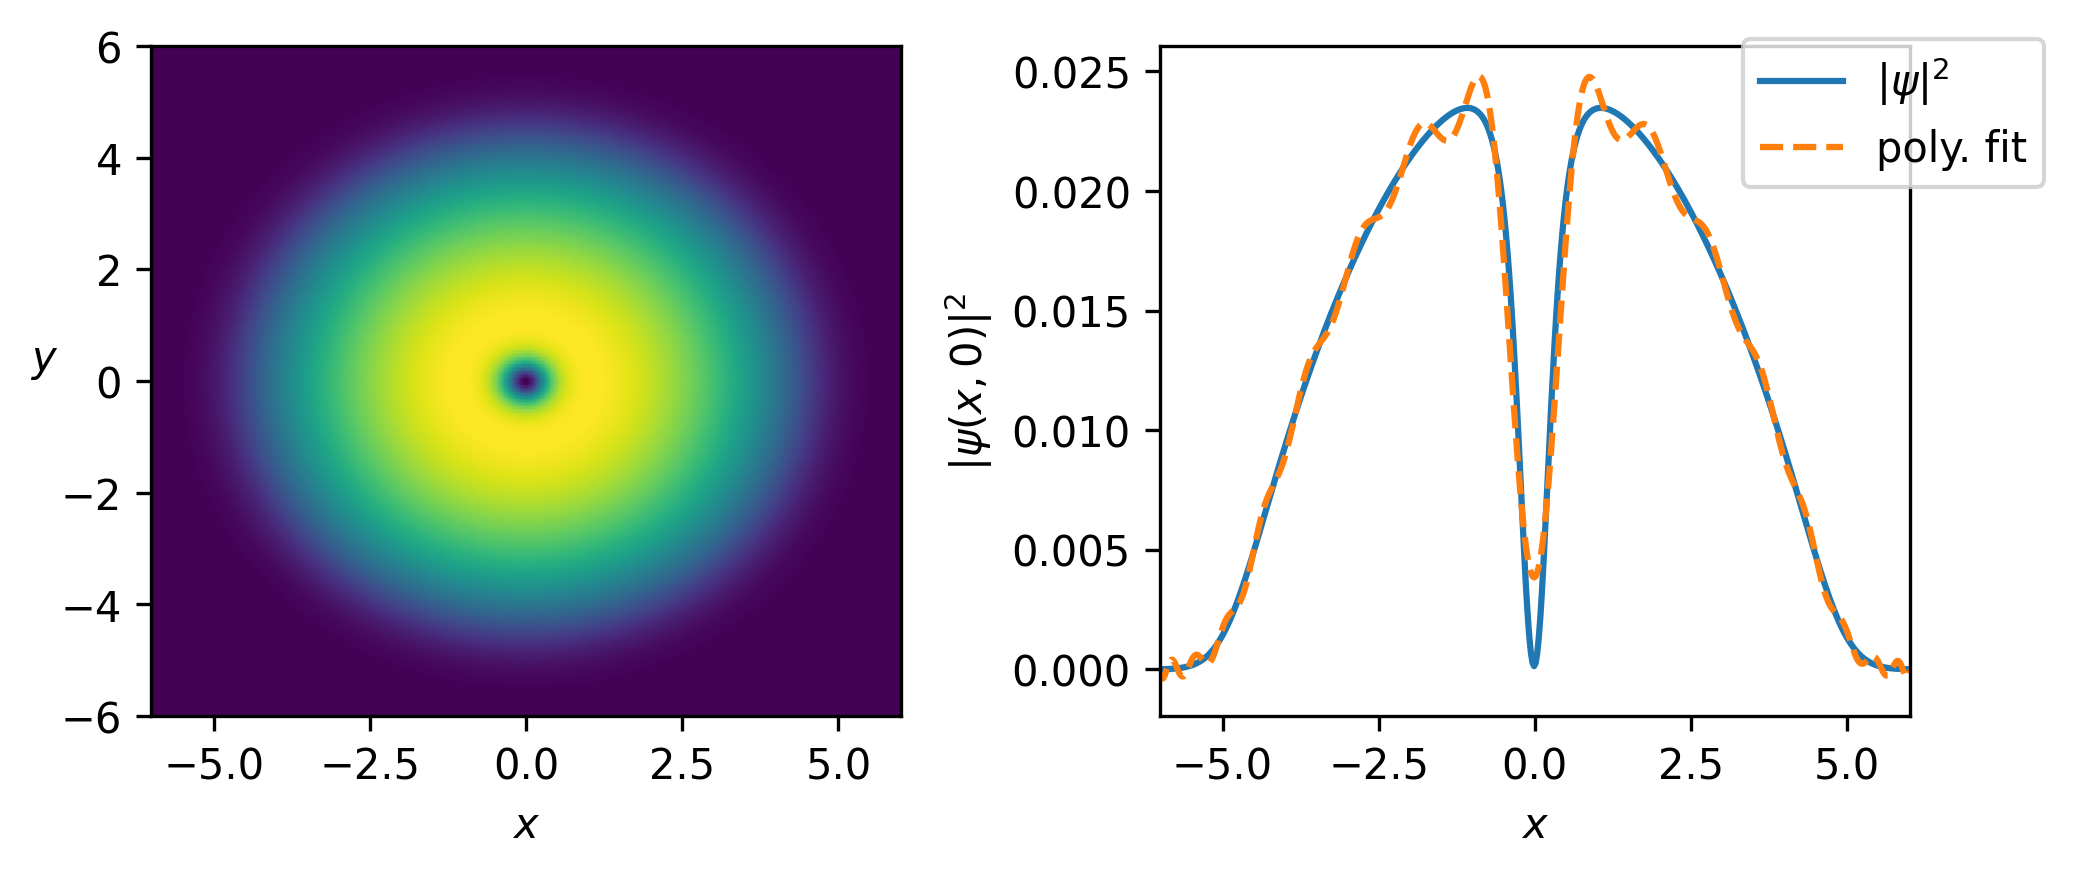

In [22]:
# load complex data
psi_r, psi_c = np.loadtxt('single.dat',usecols=(0, 1), unpack='True')

psi = reshape(psi_r, (N, N)) + 1j*reshape(psi_c, (N, N))

psi2 = abs(psi)*abs(psi)
angle = np.arctan2(imag(psi), real(psi))
# 1D polynomial fit
fit = np.poly1d(numpy.polyfit(x[:,0],psi2[int(N/2),:], 75))
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3), dpi=300)
ax[0].pcolormesh(X, Y, psi2)
ax[0].set_xlim(-6,6)
ax[0].set_ylim(-6,6)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$', rotation=360)
ax[1].plot(x[:,0], abs(psi[int(N/2),:])**2, linestyle ='-',  label='$|\psi|^2$')
ax[1].plot(x[:,0], fit(x[:,0]), linestyle ='--',  label='poly. fit')
ax[1].set_xlim(-6,6)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$|\psi(x,0)|^2$')
ax[1].legend(loc='center left', ncol =1, bbox_to_anchor=(.75, 0.9))
fig.tight_layout(pad=1.0)

In [25]:
## calculate velocity field
rho = abs(psi)**2
phi = fft.fft2(psi)
cpx = fft.ifft2(1j*kx*phi)
cpy = (fft.ifft2(1j*ky.T*phi))
vx = (imag(conj(psi)*cpx))/rho 
vx = np.nan_to_num(vx, nan=0, posinf=0, neginf=0)
vy = (imag(conj(psi)*cpy))/rho
vy = np.nan_to_num(vy, nan=0, posinf=0, neginf=0)

(-6.0, 6.0, -6.0, 6.0)

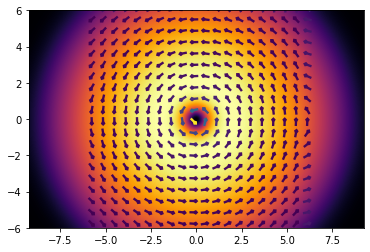

In [26]:
## plot normalized velocity field
N1=25
vxy = hypot(vx,vy)
plt.figure()
#p1= plt.contourf(x, y, psi2,cmap='inferno', alpha=1)
p1=plt.imshow(psi2, extent=[-12, 12, -12, 12], origin='lower',cmap='inferno', alpha=1)
p1=plt.quiver(x[::N1,::N1],y[::N1,::N1], vy[::N1,::N1]/vxy[::N1,::N1], 
              vx[::N1,::N1]/vxy[::N1,::N1], vxy[::N1,::N1], pivot='mid', 
             width=.007, headwidth=2,headlength=1, headaxislength=2, minlength=2)
plt.axis('equal')
xyrange= [-6., 6., -6., 6.]
axis(xyrange)
#plt.colorbar()